# Keras
Librería para programar redes neuronales de una manera más sencilla que con TensorFlow. Keras se encuentra en una capa de abstracción por encima de TensorFlow.

[Documentación](https://keras.io/guides/)

In [1]:
!pip install tensorflow
!pip install keras

     -------------------------------------- 266.3/266.3 MB 8.2 MB/s eta 0:00:00
     --------------------------------------- 24.4/24.4 MB 31.1 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 47.6 MB/s eta 0:00:00
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     ---------------------------------------- 4.1/4.1 MB 32.7 MB/s eta 0:00:00
     ------------------------------------- 896.6/896.6 kB 55.4 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 33.6 MB/s eta 0:00:00
  Using cached tensorflow_estimator-2.11.0-py2.py3-none-any.whl (439 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     -------------------------------------- 126.5/126.5 kB 7.8 MB/s eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 38.3 MB/s eta 0:00:00
  Using cached keras-2.11.0-py2.py3-none-any.whl (1.7 MB)
    

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
web3 6.3.0 requires protobuf>=4.21.6, but you have protobuf 3.19.6 which is incompatible.

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Empezamos importando librerías

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np

Cargamos los datos de mnist. No vamos a tratar imagenes con redes convolucionales (perdemos la estructura espacial 2D). Todos los pixeles se convertirán en un vector de 28x28 features independientes, que serán las entradas del modelo.

In [2]:
# Cogemos las imágenes de los dígitos asi como el conjunto de train y test
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


Vemos dimensiones del dataset

In [3]:
'''
60.000 imagenes de 28x28 pixeles
'''
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

60.000 imágenes de 28x28 pixeles. Vamos a representar una de ellas

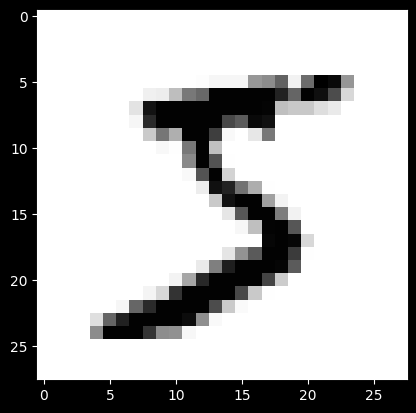

In [5]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap=plt.cm.get_cmap('Greys'));

Cada imagen se compone de 28x28 pixeles, y cada pixel representa una escala de grises que va del 0 al 255. Siendo 0 el blanco y 255 negro.

¿Se te ocurre alguna manera de normalizar los datos?

In [6]:
0/255

0.0

In [7]:
128/255

0.5019607843137255

In [8]:
255/255

1.0

In [9]:
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

In [10]:
np.mean(X_train)

0.13066062

In [11]:
'''
Comprobamos la normalización
'''
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

Guardamos datos para validación. Estos datos se usarán durante el entrenamiento. Otra opción es decirle a keras en la etapa de entrenamiento que reserve un X % de los datos para validar.

In [13]:
X_val = X_train[-10000:]
y_val = y_train[-10000:]

X_train = X_train[:-10000]
y_train = y_train[:-10000]

In [14]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


Montamos la arquitectura de la red neuronal. Se va a componer de:
* **Sequential**: API para iniciar la red neuronal. No cuenta como capa.
* **Flatten**: capa de entrada. Necesita un vector unidimensional. Como tenemos imágenes, esta capa aplana las imagenes (2D) en 1D.
* **Dense**: es una hidden layer. Se compondrá de `n` neuronas y de una función de activación que se aplicará a todas las neuronas de la capa.

Recuerda que es un problema de clasificación multiclase (10 clases) y que por tanto la última capa se compondrá de tantas neuronas como clases tengas.

En cuanto a las funciones de activación es recomendable usar relu en las hidden layer, que tarda menos en entrenar, mientras que la ultima (output) suele ser una softmax.

In [15]:
model = keras.models.Sequential()

# Capa entrada
model.add(keras.layers.Flatten(input_shape=(28, 28)))

# Hidden layer
model.add(keras.layers.Dense(units = 300,
                            activation='relu'))

# Hidden layer
model.add(keras.layers.Dense(units = 100,
                            activation='relu'))

# Capa salida
model.add(keras.layers.Dense(units = 10,
                            activation='softmax'))

In [16]:
# Otra manera de declarar la red neuronal
capas = [
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(units = 300, activation='relu'),
    keras.layers.Dense(units = 100, activation='relu'),
    keras.layers.Dense(units = 10, activation='softmax')
]

model = keras.models.Sequential(capas)

Podemos ver las capas, y acceder a sus elementos

In [18]:
print(model.layers[1])

Podemos ver los pesos de las capas sin entrenar, porque los inicializa aleatoriamente. Los bias los inicializa a 0.

In [25]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()

In [26]:
len(weights[0])

300

In [28]:
28*28

784

In [29]:
300*784

235200

In [30]:
weights.size

235200

In [31]:
biases[:20]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

Establecemos la configuración de ejecución... el compile.

In [32]:
model.compile(
    optimizer = keras.optimizers.SGD(),
    loss = keras.losses.SparseCategoricalCrossentropy(),
    metrics = [keras.metrics.SparseCategoricalAccuracy()]
)

In [33]:
# Equivalente
model.compile(
    optimizer = "sgd",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [34]:
# Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Entrenamos el modelo. Usamos los datos de entrenamiento. El batch_size es la cantidad de muestras que utiliza el SGD, y las epochs son las iteraciones que realiza en el entrenamiento.

In [35]:
X_train.shape

(50000, 28, 28)

In [36]:
50000/128

390.625

In [37]:
history = model.fit(
    X_train,
    y_train,
    batch_size = 128,
    epochs = 50,
    validation_data = (X_val, y_val) # validation_split = 0.1
)

Epoch 1/50
391/391 [==============================] - 3s 4ms/step - loss: 1.3255 - accuracy: 0.6701 - val_loss: 0.6281 - val_accuracy: 0.8620
Epoch 2/50
391/391 [==============================] - 1s 3ms/step - loss: 0.5372 - accuracy: 0.8661 - val_loss: 0.4044 - val_accuracy: 0.8957
Epoch 3/50
391/391 [==============================] - 1s 3ms/step - loss: 0.4088 - accuracy: 0.8893 - val_loss: 0.3393 - val_accuracy: 0.9063
Epoch 4/50
391/391 [==============================] - 1s 3ms/step - loss: 0.3561 - accuracy: 0.9020 - val_loss: 0.3065 - val_accuracy: 0.9141
Epoch 5/50
391/391 [==============================] - 1s 3ms/step - loss: 0.3243 - accuracy: 0.9095 - val_loss: 0.2853 - val_accuracy: 0.9174
Epoch 6/50
391/391 [==============================] - 1s 3ms/step - loss: 0.3023 - accuracy: 0.9148 - val_loss: 0.2691 - val_accuracy: 0.9231
Epoch 7/50
391/391 [==============================] - 1s 3ms/step - loss: 0.2850 - accuracy: 0.9199 - val_loss: 0.2553 - val_accuracy: 0.9274
Epoch 

Podemos reentrenar el modelo. No empieza de nuevo, sino que retoma el entrenamiento anterior.

In [38]:
model.fit(
    X_train,
    y_train,
    batch_size = 64,
    epochs = 10,
    validation_data = (X_val, y_val) # validation_split = 0.1
)

Epoch 1/10
782/782 [==============================] - 2s 3ms/step - loss: 0.0850 - accuracy: 0.9773 - val_loss: 0.1051 - val_accuracy: 0.9711
Epoch 2/10
782/782 [==============================] - 2s 3ms/step - loss: 0.0820 - accuracy: 0.9778 - val_loss: 0.1082 - val_accuracy: 0.9698
Epoch 3/10
782/782 [==============================] - 3s 4ms/step - loss: 0.0789 - accuracy: 0.9791 - val_loss: 0.1060 - val_accuracy: 0.9709
Epoch 4/10
782/782 [==============================] - 3s 4ms/step - loss: 0.0759 - accuracy: 0.9797 - val_loss: 0.0994 - val_accuracy: 0.9716
Epoch 5/10
782/782 [==============================] - 3s 4ms/step - loss: 0.0732 - accuracy: 0.9804 - val_loss: 0.0980 - val_accuracy: 0.9721
Epoch 6/10
782/782 [==============================] - 3s 4ms/step - loss: 0.0707 - accuracy: 0.9813 - val_loss: 0.0962 - val_accuracy: 0.9722
Epoch 7/10
782/782 [==============================] - 3s 4ms/step - loss: 0.0682 - accuracy: 0.9816 - val_loss: 0.0949 - val_accuracy: 0.9723
Epoch 

Veamos el histórico del entrenamiento, para poder representarlo posteriormente.

In [39]:
print(history.params)
print(history.epoch)
history.history

{'verbose': 1, 'epochs': 50, 'steps': 391}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


{'loss': [1.3255122900009155,
  0.5372045040130615,
  0.40881624817848206,
  0.35611504316329956,
  0.32433149218559265,
  0.3023306429386139,
  0.2850038409233093,
  0.2707560658454895,
  0.2581365704536438,
  0.24710839986801147,
  0.2374064326286316,
  0.22826285660266876,
  0.21982134878635406,
  0.212418794631958,
  0.20530423521995544,
  0.1986558735370636,
  0.19244743883609772,
  0.1863471269607544,
  0.18042941391468048,
  0.17505422234535217,
  0.17018067836761475,
  0.16534046828746796,
  0.16064375638961792,
  0.1564418524503708,
  0.15214723348617554,
  0.14815030992031097,
  0.1440407633781433,
  0.14052394032478333,
  0.13696303963661194,
  0.13352636992931366,
  0.1303326040506363,
  0.1270647495985031,
  0.12412892282009125,
  0.12128923833370209,
  0.11832328140735626,
  0.11571290343999863,
  0.11314880847930908,
  0.11052998155355453,
  0.10808467864990234,
  0.10574314743280411,
  0.10353601723909378,
  0.10116498917341232,
  0.0990108773112297,
  0.097248040139675

In [40]:
history.history

{'loss': [1.3255122900009155,
  0.5372045040130615,
  0.40881624817848206,
  0.35611504316329956,
  0.32433149218559265,
  0.3023306429386139,
  0.2850038409233093,
  0.2707560658454895,
  0.2581365704536438,
  0.24710839986801147,
  0.2374064326286316,
  0.22826285660266876,
  0.21982134878635406,
  0.212418794631958,
  0.20530423521995544,
  0.1986558735370636,
  0.19244743883609772,
  0.1863471269607544,
  0.18042941391468048,
  0.17505422234535217,
  0.17018067836761475,
  0.16534046828746796,
  0.16064375638961792,
  0.1564418524503708,
  0.15214723348617554,
  0.14815030992031097,
  0.1440407633781433,
  0.14052394032478333,
  0.13696303963661194,
  0.13352636992931366,
  0.1303326040506363,
  0.1270647495985031,
  0.12412892282009125,
  0.12128923833370209,
  0.11832328140735626,
  0.11571290343999863,
  0.11314880847930908,
  0.11052998155355453,
  0.10808467864990234,
  0.10574314743280411,
  0.10353601723909378,
  0.10116498917341232,
  0.0990108773112297,
  0.097248040139675

In [41]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [42]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.325512,0.67012,0.628118,0.8620
1,0.537205,0.86606,0.404364,0.8957
2,0.408816,0.88930,0.339288,0.9063
3,0.356115,0.90202,0.306451,0.9141
4,0.324331,0.90952,0.285257,0.9174
5,0.302331,0.91478,0.269117,0.9231
6,0.285004,0.91992,0.255307,0.9274
7,0.270756,0.92384,0.244285,0.9318
8,0.258137,0.92708,0.234423,0.9342
9,0.247108,0.93064,0.226709,0.9360


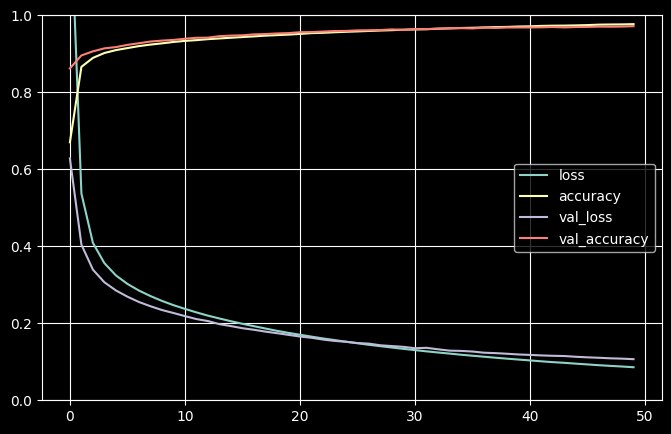

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Si el modelo no ha ido bien, prueba a cambiar el learning rate, cambia de optimizador y después prueba a cambiar capas, neuronas y funciones de activación.

Ya tenemos el modelo entrenado. Probémoslo con test

In [44]:
results = model.evaluate(X_test, y_test)
results

313/313 [==============================] - 1s 2ms/step - loss: 0.0925 - accuracy: 0.9734


[0.09250835329294205, 0.9733999967575073]

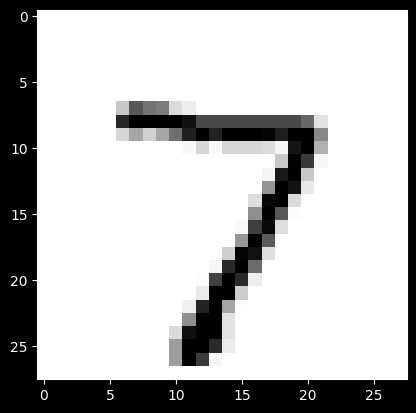

In [45]:
# Cogemos el primero
plt.imshow(X_test[0].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));

In [46]:
X_test[:1]

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [47]:
predictions = model.predict(X_test[:1]).round(3)
print(predictions.shape)
predictions

1/1 [==============================] - 0s 103ms/step
(1, 10)


array([[0.   , 0.   , 0.   , 0.002, 0.   , 0.   , 0.   , 0.998, 0.   ,
        0.   ]], dtype=float32)

In [48]:
predictions.argmax()

7

In [56]:
pred_test = model.predict(X_test).argmax(axis=1)

313/313 [==============================] - 0s 1ms/step


4


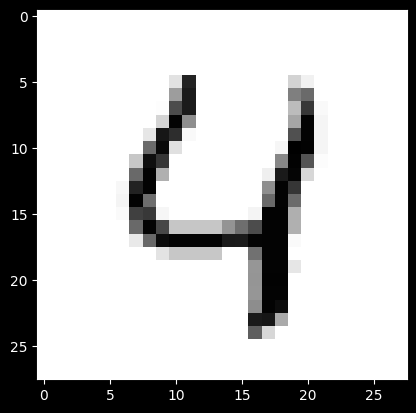

In [63]:
print(pred_test[4])
plt.imshow(X_test[4].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));

### Problema de regresión
Veamos un ejemplo de cómo aplicar una red neuronal de TensorFlow a un problema de regresión.

In [65]:
# Cargamos datos
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns = housing.feature_names)
df['target'] = housing['target']
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [66]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

Divimos en train, test y validation

In [70]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,
                                                              housing.target, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,
                                                      y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [71]:
X_train.shape

(11610, 8)

Montamos el modelo. Simplemente se compondrá de una hidden layer, a la que le configuramos una capa previa de entrada de 8 neuronas (las features).

Se trata de un modelo de regresión, por lo que la capa de salida es una única neurona.

In [72]:
11610/32

362.8125

In [73]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = 'relu',
                      input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss = "mean_squared_error",
             optimizer = "sgd")

history = model.fit(X_train,
                   y_train,
                   epochs = 20,
                   validation_data = (X_valid, y_valid), 
                   )

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8032 - val_loss: 5.8649
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4962 - val_loss: 2.0676
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4447 - val_loss: 1.0803
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4273 - val_loss: 6.7461
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4257 - val_loss: 14.1063
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5615 - val_loss: 3.1107
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4178 - val_loss: 8.1835
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4377 - val_loss: 3.2079
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4081 - val_loss: 0.3650
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3857 - val_loss: 0.358

In [72]:
8*30 + 30

270

In [74]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 30)                270       
                                                                 
 dense_7 (Dense)             (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [75]:
mse_test = model.evaluate(X_test, y_test)
print(mse_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3513
0.3512588143348694


In [84]:
y_pred = model.predict(X_test[:2000])
# y_pred

63/63 [==============================] - 0s 1ms/step


In [83]:
y_test.shape

(5160,)

In [85]:
from sklearn.metrics import mean_squared_error, r2_score

print(mean_squared_error(y_test[:2000], y_pred))
print(r2_score(y_test[:2000], y_pred))

0.3688646336538541
0.7233715492146345


In [78]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [87]:
import pickle

pickle.dump(model, open("model.pkl", "wb"))

In [88]:
mod = pickle.load(open("model.pkl", "rb"))

### Guardar modelo
Para guardar el modelo, en el formato de Keras (HDF5). 

In [91]:
model

In [94]:
model.save("my_keras_model.h5")

In [93]:
# Lo volvemos a cargar
model = keras.models.load_model("my_keras_model.h5")

### Callbacks
Son funciones predefinidas de Keras a aplicar durante el entrenamiento
Por ejemplo, `ModelCheckpoint` sirve para que el modelo se vaya guardando tras cada epoch. Así no perdemos el progreso en caso de que decidamos interrumpir el entrenamiento. El callback recibe como argumento el nombre del objeto donde queremos que se guarde el modelo entrenado.

In [95]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("callback_model.h5")
history = model.fit(X_train,
                   y_train,
                   epochs=30,
                   callbacks = [checkpoint_cb])

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3916
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3646
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3593
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3557
Epoch 5/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3524
Epoch 6/30
 97/363 [=======>......................] - ETA: 0s - loss: 0.3330

KeyboardInterrupt: 

In [96]:
model = keras.models.load_model("callback_model.h5")

In [97]:
model

### Early Stopping
Interrumpe el entrenamiento cuando no ve progreso en el set de validación. Para ello tiene en cuenta un numero de epochs llamado `patience`. Se puede combinar con el callback

In [105]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2)
history = model.fit(X_train,
                   y_train,
                   epochs=20,
                    validation_data = (X_valid, y_valid),
                   callbacks = [early_stopping_cb])

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3315 - val_loss: 0.3351
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3303 - val_loss: 0.3404
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3303 - val_loss: 0.3460
